In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.7.0


In [2]:
#datasetFileName = "alldataset.npz"
datasetFileName = "master_dataset.npz"


with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']


print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)

(423,)
(423,)
(423,)


In [3]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)

object
int32
<U10
(423,)
(423,)
(423,)


In [26]:
dataLabels[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 3, 7, 0, 1, 3, 7, 0, 1, 3, 4, 6,
       7, 8, 0, 1, 3, 4, 6, 7, 8, 0, 1, 2, 3, 6, 7, 8, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 0, 1, 3, 4, 6, 7, 1, 2, 3, 6, 7, 0, 1, 3, 4, 6, 7, 1, 2,
       3, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 2, 3, 6, 7, 8, 0, 1, 3, 4, 7,
       1, 3, 5, 6, 8, 1, 2, 3, 6, 7, 1, 2, 4, 6, 7, 8, 1, 5, 1, 2, 3, 5,
       6, 7, 8, 1, 2, 4, 8, 1, 2, 3, 4, 5, 7, 8, 1, 2, 3, 4, 6, 7, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 6, 7, 0, 1, 0, 1, 3, 4, 5, 6, 7,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 4, 5, 6, 7, 8, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 0, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 0, 1, 2, 3, 4, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 2, 3,
       8, 0, 1, 2, 3, 4, 5, 7, 8, 0, 1, 2, 3, 6, 7, 8, 0, 1, 2, 3, 6, 7,
       8, 0, 1, 2, 3, 6, 7, 8, 0, 1, 2, 3, 6, 7, 8, 0, 1, 2, 3, 6, 7, 8,
       0, 1, 2, 3, 3, 6, 7, 8, 0, 1, 2, 3, 6, 7, 8, 0, 1, 2, 3, 6, 7, 8,
       0, 1, 3, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7,

In [5]:
dataLabelNames[0:10]

array(['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng',
       'mahmuda', 'numan', 'saseendran', 'afiq', 'azureen', 'goke',
       'numan', 'afiq', 'azureen', 'goke', 'numan', 'afiq', 'azureen',
       'goke', 'inamul', 'mahmuda', 'numan', 'saseendran', 'afiq',
       'azureen', 'goke', 'inamul', 'mahmuda', 'numan', 'saseendran',
       'afiq', 'azureen', 'gavin', 'goke', 'mahmuda', 'numan',
       'saseendran', 'afiq', 'azureen', 'gavin', 'goke', 'inamul',
       'jincheng', 'mahmuda', 'numan', 'saseendran', 'afiq', 'azureen',
       'goke', 'inamul', 'mahmuda', 'numan', 'azureen', 'gavin', 'goke',
       'mahmuda', 'numan', 'afiq', 'azureen', 'goke', 'inamul', 'mahmuda',
       'numan', 'azureen', 'gavin', 'goke', 'numan', 'saseendran', 'afiq',
       'azureen', 'gavin', 'goke', 'inamul', 'jincheng', 'mahmuda',
       'numan', 'saseendran', 'gavin', 'goke', 'mahmuda', 'numan',
       'saseendran', 'afiq', 'azureen', 'goke', 'inamul', 'numan',
       'azureen', 'goke', 'jinch

In [6]:
classNames = sorted(np.unique(dataLabels))
classNames

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [7]:
# model expect shape of image to be 200x200

import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [8]:
dataImages.shape

(423, 200, 200, 3)

In [9]:
gryImages = np.zeros(dataImages.shape[:-1])
for i in range(dataImages.shape[0]):
    gryImages[i] = cv.cvtColor(dataImages[i],cv.COLOR_BGR2GRAY)
    #gryImages[i]

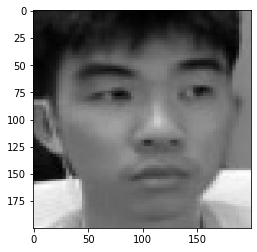

In [15]:
import matplotlib.pyplot as plt
plt.imshow(gryImages[5],cmap='gray')
plt.show()


In [71]:
gryImages[0]


array([[239., 239., 239., ..., 239., 238., 238.],
       [239., 239., 239., ..., 239., 238., 238.],
       [239., 239., 239., ..., 239., 238., 238.],
       ...,
       [ 76.,  76.,  76., ..., 104.,  70.,  70.],
       [ 43.,  43.,  43., ...,  98.,  69.,  69.],
       [ 43.,  43.,  43., ...,  98.,  69.,  69.]])

In [72]:
#select color image or gray image
#dataImages = gryImages

In [48]:
# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabelNames, test_size=0.30, random_state=42)

print(trainImages.shape)
print(testImages.shape)

(296, 200, 200, 3)
(127, 200, 200, 3)


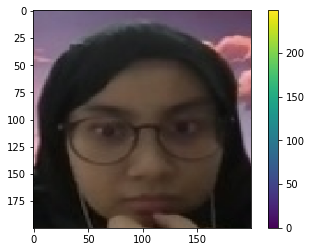

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])#,cmap='gray')
#plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200, 3), 9)

In [51]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0

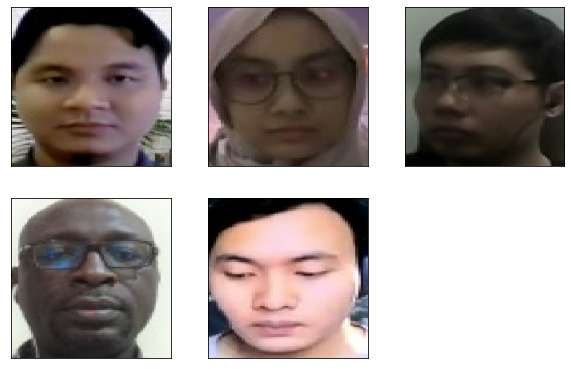

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataImages[i], cmap='gray')
    #plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [53]:
# creating the model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 120000)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               15360128  
                                                                 
 dense_5 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 15,361,289
Trainable params: 15,361,289
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
testImages.dtype

dtype('float64')

In [56]:
model.fit(trainImages, trainLabels, epochs=30)

Epoch 1/30


UnimplementedError:  Cast string to float is not supported
	 [[node Cast_1
 (defined at C:\SDK\Python39\lib\site-packages\keras\metrics.py:716)
]] [Op:__inference_train_function_4847]

Errors may have originated from an input operation.
Input Source operations connected to node Cast_1:
In[0] ExpandDims_1 (defined at C:\SDK\Python39\lib\site-packages\keras\engine\compile_utils.py:677)

Operation defined at: (most recent call last)
>>>   File "C:\SDK\Python39\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\SDK\Python39\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\SDK\Python39\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\SDK\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\SDK\Python39\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\USER\AppData\Local\Temp/ipykernel_12624/4120046984.py", line 1, in <module>
>>>     model.fit(trainImages, trainLabels, epochs=30)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\keras\engine\training.py", line 817, in train_step
>>>     self.compiled_metrics.update_state(y, y_pred, sample_weight)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\keras\engine\compile_utils.py", line 460, in update_state
>>>     metric_obj.update_state(y_t, y_p, sample_weight=mask)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\keras\utils\metrics_utils.py", line 73, in decorated
>>>     update_op = update_state_fn(*args, **kwargs)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\keras\metrics.py", line 177, in update_state_fn
>>>     return ag_update_state(*args, **kwargs)
>>> 
>>>   File "C:\SDK\Python39\lib\site-packages\keras\metrics.py", line 716, in update_state
>>>     y_true = tf.cast(y_true, self._dtype)
>>> 

In [ ]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

4/4 - 0s - loss: 0.2375 - accuracy: 0.9449 - 311ms/epoch - 78ms/step

Test accuracy: 0.9448819160461426


TypeError: list indices must be integers or slices, not numpy.str_

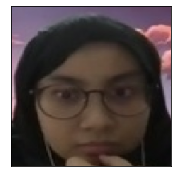

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap='gray')
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [ ]:
predictions = model.predict(testImages)
predictions[0]

array([ 28.854567  ,  -7.384617  , -17.785908  , -11.096462  ,
       -34.358074  ,   0.87190574, -34.014343  ,  20.971458  ,
        -2.1577694 ], dtype=float32)

In [ ]:
i = 1
predictedLabel = np.argmax(predictions[i])
predictedLabel,testLabels[i],predictedLabel == testLabels[i]

(1, 1, True)

In [ ]:
probabilityModel = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probabilityModel.predict(testImages)
predictions[0]

array([9.9962306e-01, 1.8254070e-16, 5.5480001e-21, 4.4599064e-18,
       3.5231896e-28, 7.0326871e-13, 4.9683797e-28, 3.7691716e-04,
       3.3989874e-14], dtype=float32)

In [ ]:
for v in predictions[0]:
    print(f'{v:.2f}',end=', ')

1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0]),testLabels[0]

(0, 0)

## Saving Model

In [ ]:
import os
exportPath = ""
if testAcc > 0.60:

    modelDir = "tf_model"
    version = f"6_{(testAcc*100):.0f}"

    exportPath = os.path.join(modelDir,version)

    model.save(exportPath, save_format="tf")

    print('\nExport Path = {}'.format(exportPath))

#!dir {exportPath}


INFO:tensorflow:Assets written to: tf_model\gray_82\assets

Export Path = tf_model\gray_82


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 40000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               5120128   
                                                                 
 dense_3 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 5,121,289
Trainable params: 5,121,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
exportPath = 'tf_model/gray_82'
newModel = tf.keras.models.load_model(exportPath)

newModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 40000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               5120128   
                                                                 
 dense_3 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 5,121,289
Trainable params: 5,121,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print(f'Restored model,accuracy:{100*acc}%')
newPredictions = newModel.predict(testImages)
print(newPredictions.shape)

1/1 - 0s - loss: 1.2674 - accuracy: 0.8182 - 220ms/epoch - 220ms/step
Restored model,accuracy:81.81818127632141%
(11, 9)


In [ ]:
maxIterations = 100
testAccList = []
thresholdAcc = 0.90
lastTestAcc = 0.0

model = None
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model2'
epoch = 30
for iter in range(maxIterations):

    print(f'Simulation{iter+1}',end = '...')
    model = tf.keras.Sequential([
        # tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    model.fit(trainImages, trainLabels, epochs=epoch,verbose=0)

    testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=0)
    testAccList.append(testAcc)

    print(f'Test Acc:{testAcc:.2f}', end='\n')

    exportPath = ""

    if testAcc > thresholdAcc:

        modelDir = "tf_model2"
        version = f"4_{(testAcc*100):.0f}"

        exportPath = os.path.join(modelDir, version)

        model.save(exportPath, save_format="tf")

        print('\nExport Path = {}'.format(exportPath), end= '\n')

        thresholdAcc = testAcc
        #break out of loop when testAcc is higher than thresholdAcc
        break

        
        
        


Simulation1...Test Acc:0.73
Simulation2...Test Acc:0.73
Simulation3...Test Acc:0.82
Simulation4...Test Acc:0.82
Simulation5...Test Acc:0.91
Simulation6...Test Acc:0.82
Simulation7...Test Acc:0.73
Simulation8...Test Acc:1.00
INFO:tensorflow:Assets written to: tf_model2\4_100\assets

Export Path = tf_model2\4_100


gokeladokun@gmail.com